## 100 Year Summary of the US Stock and Bond Market
### By Hitaansh Gaur

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# This is done using CRSP data from WRDS
stock_csv_path = "data/stock_data.csv"
bond_csv_path = "data/bond_data.csv"

stock_df = pd.read_csv(stock_csv_path)
bond_df = pd.read_csv(bond_csv_path)

#Want to make sure the dates are correct, so I adjust the dates on these before merging.
stock_df["caldt"] = pd.to_datetime(stock_df["caldt"])
bond_df["caldt"] = pd.to_datetime(stock_df["caldt"])

stock_df["caldt"] = stock_df["caldt"] + pd.tseries.offsets.MonthEnd(0)
bond_df["caldt"] = bond_df["caldt"] + pd.tseries.offsets.MonthEnd(0)

total_df = pd.merge(left=stock_df, right=bond_df, on='caldt', how='outer')
display(total_df[178:182])
total_df.info()

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,...,b2ret,b2ind,b1ret,b1ind,t90ret,t90ind,t30ret,t30ind,cpiret,cpiind
178,1940-10-31,0.041468,0.040180,0.061607,0.059823,15484615.7,90,14886481.6,90.0,11.08,...,NaN,39.54598,NaN,39.84357,0.000017,43.27140,-0.000140,47.45490,0.000000,32.9
179,1940-11-30,-0.029431,-0.042997,-0.044140,-0.052155,14818817.3,90,15484615.7,90.0,10.61,...,NaN,39.54598,NaN,39.84357,0.000017,43.27214,0.000017,47.45572,0.000000,32.9
180,1940-12-31,0.002927,-0.002490,-0.013939,-0.020375,14791912.6,90,14818817.3,90.0,10.58,...,NaN,39.54598,NaN,39.84357,0.000009,43.27252,-0.000147,47.44871,0.007143,33.2
181,1941-01-31,-0.045555,-0.046847,-0.019415,-0.022340,14098962.5,90,14791912.6,90.0,10.07,...,-0.006832,39.27580,-0.006832,39.57136,-0.000069,43.26956,-0.000069,47.44545,0.000000,33.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   caldt   1165 non-null   datetime64[ns]
 1   vwretd  1164 non-null   float64       
 2   vwretx  1164 non-null   float64       
 3   ewretd  1164 non-null   float64       
 4   ewretx  1164 non-null   float64       
 5   totval  1165 non-null   float64       
 6   totcnt  1165 non-null   int64         
 7   usdval  1164 non-null   float64       
 8   usdcnt  1164 non-null   float64       
 9   spindx  1165 non-null   float64       
 10  sprtrn  1164 non-null   float64       
 11  b30ret  974 non-null    float64       
 12  b30ind  1165 non-null   float64       
 13  b20ret  972 non-null    float64       
 14  b20ind  1165 non-null   float64       
 15  b10ret  980 non-null    float64       
 16  b10ind  1165 non-null   float64       
 17  b7ret   981 non-null    float64       
 18  b7ind   

In [4]:
# Format and Clean Data

# What we find is that bond data is missing for the first 15 years (the first 180 months exactly). 
# We want to plot the cummulative returns of the last 100 years for the all the securities, but the NAN will mess us up
# To fix this we set them to 0 when we do the cummulative product so that they dont impact it and also don't modify the original data

rev_cols = [name for name in total_df.columns if name[-4:] == "retd" or name[-3:] == "ret"]
print(rev_cols)
cum_cols = [name+"_cum" for name in rev_cols]
total_df[cum_cols] = (total_df[rev_cols].fillna(0)+1).cumprod() # have to add 1 because that is gross returns will the calculated
display(total_df[cum_cols])

['vwretd', 'ewretd', 'b30ret', 'b20ret', 'b10ret', 'b7ret', 'b5ret', 'b2ret', 'b1ret', 't90ret', 't30ret', 'cpiret']


,vwretd_cum,ewretd_cum,b30ret_cum,b20ret_cum,b10ret_cum,b7ret_cum,b5ret_cum,b2ret_cum,b1ret_cum,t90ret_cum,t30ret_cum,cpiret_cum
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998217,1.006457,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.004042,1.002951,1.000000
2,0.964980,0.966220,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.007292,1.005727,1.000000
3,0.909293,0.900599,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.010090,1.008521,0.994413
4,0.944321,0.928915,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.013193,1.011619,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1160,10369.084413,42407.518778,53.474314,65.138174,52.296246,65.906959,55.659265,38.647902,33.365033,29.693146,21.613330,16.545926
1161,9420.365034,38465.612685,48.920709,60.712360,49.678505,63.334611,53.886406,38.150696,33.230705,29.743149,21.655022,16.581516
1162,10176.330488,42182.429442,45.710336,58.217568,48.934918,62.914766,53.687458,38.159204,33.276298,29.798441,21.705413,16.648771
1163,10727.541605,45093.438898,49.272588,62.363125,50.930924,65.154154,55.083546,38.467149,33.343383,29.891234,21.767404,16.631956


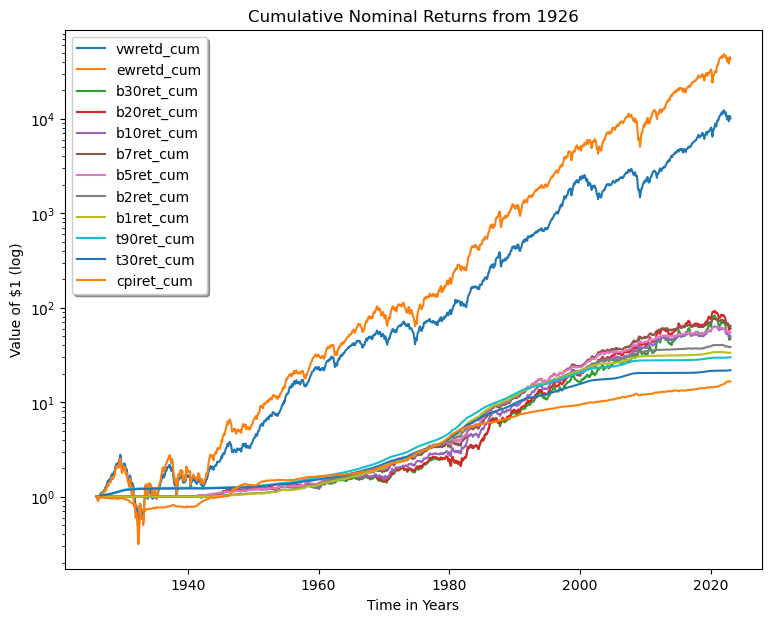

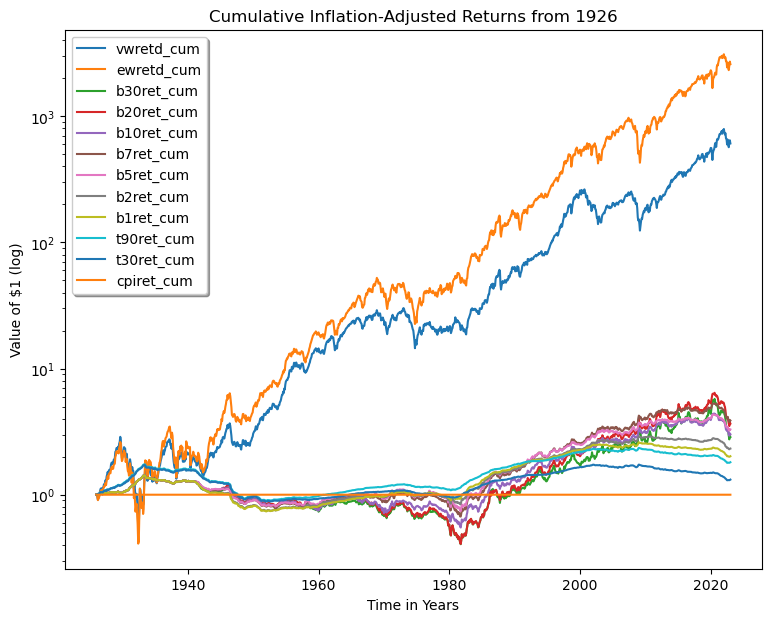

In [26]:
# Now we plot these cumulative nominal returns for all of these securities
plt.figure(figsize=(9,7))
plt.title("Cumulative Nominal Returns from 1926")
plt.xlabel("Time in Years")
plt.ylabel("Value of $1 (log)")
plt.plot(total_df["caldt"], total_df[cum_cols], label = cum_cols)
plt.legend(loc='upper left', shadow=True)
plt.yscale('log')
plt.show()

# We also want to see what these returns look like with inflation adjustment
plt.figure(figsize=(9,7))
plt.title("Cumulative Inflation-Adjusted Returns from 1926")
plt.xlabel("Time in Years")
plt.ylabel("Value of $1 (log)")

# Here CPIret is the cummulative inflation so far. We divide our cummulative returns by our cummulative inflation to get inflation
# adjusted returns
plt.plot(total_df["caldt"], total_df[cum_cols].to_numpy()/total_df["cpiret_cum"].to_numpy().reshape(-1,1), label = cum_cols)
plt.legend(loc='upper left', shadow=True)
plt.yscale('log')
plt.show()

### Important take aways

We can clearly see that stocks out perform bonds here. That shouldn't be too big of a suprise (from what we know as conventional knoweldge). However, what is important to see here is that the Equally Weighted Portoflio outperofrms the Value Weighted Portfolio by a good amount. This may be suprising as it shows that big players highly weighted (which heavily dominate the Value Weighted) don't always out perform the small perfomers (queue the current drama with "is the S&P 500 too top heavy?"). In fact, after doing some additional research, it is clear smaller cap companies actually have the freedom to move around and make more changes internally, which leads to them outperforming higher cap companies in many instances. When they are equally weighted, it leads to greater total returns. 

### Looking at the Equity Premium Puzzle
Having this info, I would like to see the difference between the performance of stocks and bonds. I will be using the Value-Weighted S&P 500 and the 30 year bond to compare with.

We learned in class the difference between what is called "mean of the log return" and "log of the mean return". The former is knowing we know how much more 1 dollar grows too at the end of so many years , what constant return factor (RELATIVE TO T BILLS PER YEAR) gives the same value? The log of this is called the mean of the log return. The latter is we can know th eact difference each year and we can find the mean of that. The log of this is called the log of mean return. If we assume that the log of the returns is nomrally disributed, the difference between these numbers should be half the variance. Lets calculate both of these and compare all the numbers.

In [40]:
num_months = len(total_df)

# We raise this to the power of 12/N to annualize the numbers
total_diff = (total_df.loc[num_months-1,"vwretd_cum"]/total_df.loc[num_months-1,"t30ret_cum"])**(12.00/num_months) 
log_total_diff = np.log(total_diff)

mean_diff = (1.00 + total_df["vwretd"].mean() - total_df["t30ret"].mean())**(12) - 1
log_mean_diff = np.log(1+mean_diff)

print(f"Annualized Internal Return Difference Ratio: {total_diff}")
print(f"Annualized Mean of the Log Return Difference Ratio: {log_total_diff}")

print(f"Annualized Mean Difference Ratio: {mean_diff}")
print(f"Annualized Log of the Mean Difference Ratio: {log_mean_diff}")

# Now we see if this difference is due to what we said before
returns_std = total_df["vwretd"].std() * np.sqrt(12) # annualizes our std
log_returns_std = np.log(1 + total_df["vwretd"]).std() * np.sqrt(12)
half_log_variance =  log_returns_std * log_returns_std * .5

print(f"Should be close to zero: {log_mean_diff - log_total_diff - half_log_variance}") 

Annualized Internal Return Difference Ratio: 1.0652457195783647
Annualized Mean of the Log Return Difference Ratio: 0.06320549515781375
Annualized Mean Difference Ratio: 0.08413118660555519
Annualized Log of the Mean Difference Ratio: 0.0807789165488549
Should be close to zero: 9.762776520304273e-05


Here we see that the equity premium is 6.32% or 8.08% depending on how you calculate it. In relation to the puzzle, it does beg the quesiton that investors even invest in bonds even if they are risk averse. The equity premium is so high that investors should put more equity in their portfolios.

### Other Important Statistics

When we create simulations (i.e. a Monte Carlo Simlation using GBM), we will need some baseline numbers to assume (such as average contiously compounded real rate of interest per year) and so on. We will calculate these below so that it is easy for us to refernce later on.

In [77]:
# These will all be averages
total_df["year"] = total_df["caldt"].dt.year
total_df["crr_real_return"] = np.log1p(total_df["b10ret"]-total_df["cpiret"])
total_df["crr_risk_premium"] = np.log1p(total_df["vwretd"]-total_df["t30ret"])
total_df["crr_cpi"] = np.log1p(total_df["cpiret"])
total_df["crr_vwretd"] = np.log1p(total_df["vwretd"])



avg_continous_real_rate = total_df.groupby("year")["crr_real_return"].sum().mean()
avg_continous_risk_premium = total_df.groupby("year")["crr_risk_premium"].sum().mean()
avg_continous_inflation = total_df.groupby("year")["crr_cpi"].sum().mean()
avg_std = total_df.groupby("year")["crr_vwretd"].std().mean()*np.sqrt(12)

print(f"The annual average continous real rate interest (using the 10 year bond): {avg_continous_real_rate}")
print(f"The annual average continous risk premium: {avg_continous_risk_premium}")
print(f"The annual average continous inflation rate: {avg_continous_inflation}")
print(f"The annual average standard deviation of the S&P: {avg_std}")

0.00871465445601503
0.06264469854733695
0.028655624095195238
0.15911356391984097
